# Import libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns  
import warnings 
warnings.filterwarnings('ignore')

# Dataset: Telecom Churn Dataset (Telecom_churn_data.csv)

## Load Data and Write script to perform following operations.

### 1. Load the data and display the structure.

In [4]:
data = pd.read_csv('IOT-temp 1.csv')
data.head(20)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
5,__export__.temp_log_196125_b0fa0b41,Room Admin,08-12-2018 09:29,31,In
6,__export__.temp_log_196121_01544d45,Room Admin,08-12-2018 09:28,29,In
7,__export__.temp_log_196122_f8b80a9f,Room Admin,08-12-2018 09:28,29,In
8,__export__.temp_log_196111_6b7a0848,Room Admin,08-12-2018 09:26,29,In
9,__export__.temp_log_196112_e134aebd,Room Admin,08-12-2018 09:26,29,In


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [6]:
data.shape

(97606, 5)

In [7]:
data.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


### 2. Check the attributes data types and Drop out unwanted columns like id , room_id

In [8]:
data.dtypes

id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

In [9]:
data = data.drop(['id', 'room_id/id'], axis = 1)
data

,noted_date,temp,out/in
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In
...,...,...,...
97601,28-07-2018 07:07,31,In
97602,28-07-2018 07:07,31,In
97603,28-07-2018 07:06,31,In
97604,28-07-2018 07:06,31,In


### 3. Check for missing values in any of the columns.

In [9]:
data.isnull().sum()

noted_date    0
temp          0
out/in        0
dtype: int64

No null/missing values

### 4. Separate out date and time values of noted_date column.

In [10]:
data['noted_date'] = pd.to_datetime(data['noted_date'])

data['date'] = data['noted_date'].dt.date
data['time'] = data['noted_date'].dt.time

data

,noted_date,temp,out/in,date,time
0,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00
1,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00
2,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00
3,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00
4,2018-08-12 09:29:00,31,In,2018-08-12,09:29:00
...,...,...,...,...,...
97601,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00
97602,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00
97603,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00
97604,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00


### 5. Further separate date,month,year from date and store as separate columns. Display the complete data with new columns.

In [11]:
data['date'] = pd.to_datetime(data['date'])

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data

,noted_date,temp,out/in,date,time,year,month,day
0,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00,2018,8,12
1,2018-08-12 09:30:00,29,In,2018-08-12,09:30:00,2018,8,12
2,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00,2018,8,12
3,2018-08-12 09:29:00,41,Out,2018-08-12,09:29:00,2018,8,12
4,2018-08-12 09:29:00,31,In,2018-08-12,09:29:00,2018,8,12
...,...,...,...,...,...,...,...,...
97601,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00,2018,7,28
97602,2018-07-28 07:07:00,31,In,2018-07-28,07:07:00,2018,7,28
97603,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00,2018,7,28
97604,2018-07-28 07:06:00,31,In,2018-07-28,07:06:00,2018,7,28


### 6. Prepare boxplot of temperature.

#### Converting "in" to 1 and "out" to 0

In [12]:
data.replace('In', 0, inplace = True)
data.replace('Out', 1, inplace = True)

data

,noted_date,temp,out/in,date,time,year,month,day
0,2018-08-12 09:30:00,29,0,2018-08-12,09:30:00,2018,8,12
1,2018-08-12 09:30:00,29,0,2018-08-12,09:30:00,2018,8,12
2,2018-08-12 09:29:00,41,1,2018-08-12,09:29:00,2018,8,12
3,2018-08-12 09:29:00,41,1,2018-08-12,09:29:00,2018,8,12
4,2018-08-12 09:29:00,31,0,2018-08-12,09:29:00,2018,8,12
...,...,...,...,...,...,...,...,...
97601,2018-07-28 07:07:00,31,0,2018-07-28,07:07:00,2018,7,28
97602,2018-07-28 07:07:00,31,0,2018-07-28,07:07:00,2018,7,28
97603,2018-07-28 07:06:00,31,0,2018-07-28,07:06:00,2018,7,28
97604,2018-07-28 07:06:00,31,0,2018-07-28,07:06:00,2018,7,28


In [13]:
data_in = data[data["out/in"] == 0]
data_out = data[data["out/in"] == 1]

#### Prepare box plot of Inside and Outside

<AxesSubplot:xlabel='out/in', ylabel='count'>

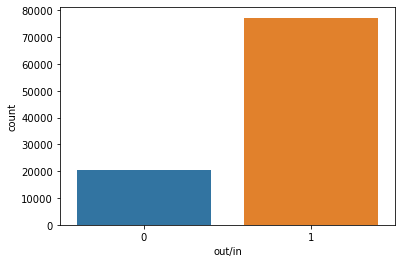

In [31]:
sns.countplot(data['out/in'])

Most of the data that we have are of temperatures recorded outside.

#### Inside temperature

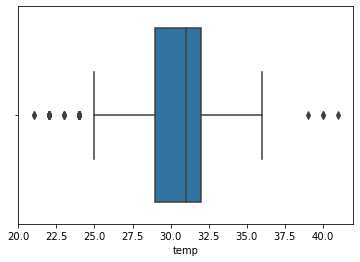

In [22]:
sns.boxplot(data_in['temp'])
plt.show()

In boxplot of inside temperature there are three ouliers above the maximum and four outliers below the minimum.

#### Outside temperature

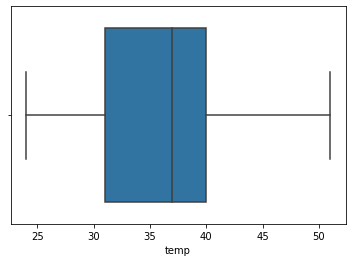

In [23]:
sns.boxplot(data_out['temp'])
plt.show()

In boxplot of outside temperature there are no outliers

### 7. Prepare barplot for in/out vs temperature.

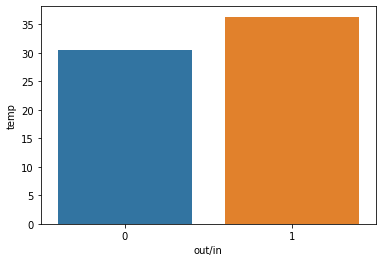

In [24]:
sns.barplot(data['out/in'],data['temp'])
plt.show()

The barplot gives us the value of average inside and outside temperatures. Mean inside temperature = 30.45 and mean outside temperature = 36.26

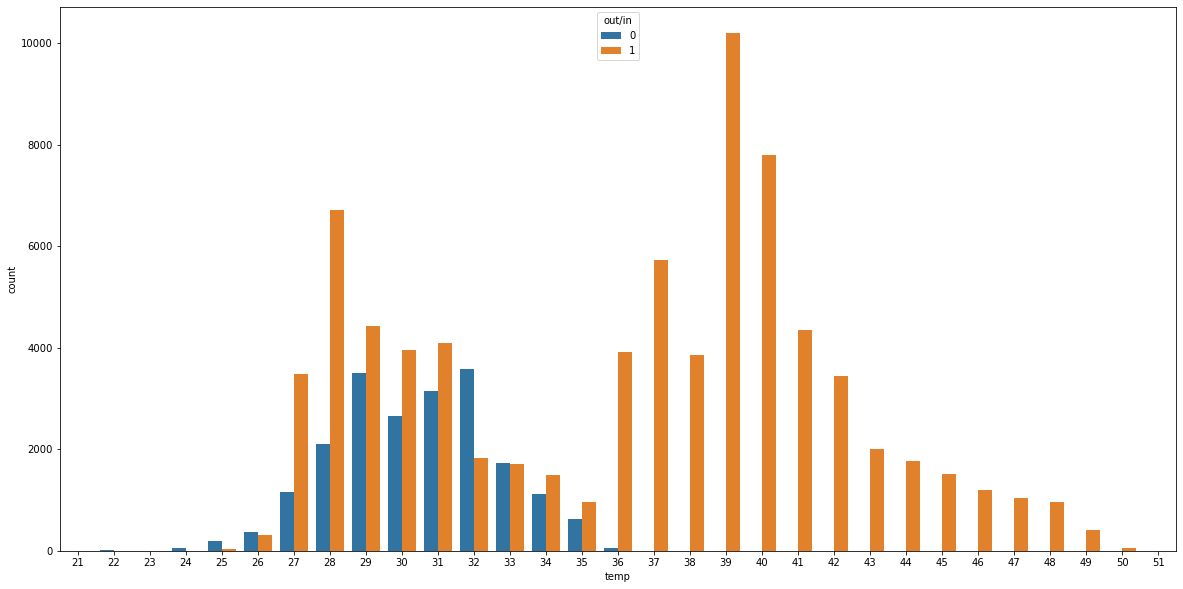

In [25]:
plt.figure(figsize = (20,10))
sns.countplot('temp', data = data, hue = 'out/in');

This barplot gives the frequency of each degree of temperature seperately for inside (in blue) and ouside (in orange).